# Description of the Task
Music recommender systems can suggest songs to users based on their listening patterns.
# Name : Danish Jameel 
# Month : Augest
# Date : 31-Augest-2022
# LetsGrow-more-Task-3
# Music Recommendation
#  Stage : 1 Begineer Level Task.




In [ ]:
# Important Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import difflib
%matplotlib inline
import gc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
import datetime
import math

In [ ]:

members_data = pd.read_csv("/content/members.csv")
sample_submission = pd.read_csv("/content/sample_submission.csv")
song_extra_info =  pd.read_csv("/content/song_extra_info.csv")
test  =  pd.read_csv("/content/test.csv")
train =  pd.read_csv("/content/train.csv")
train =  pd.read_csv("/content/train.csv")
song =  pd.read_csv("/content/songs.csv")

In [ ]:
members_data


,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
...,...,...,...,...,...,...,...
34398,Wwd/cudKVuLJ3txRVxlg2Zaeliu+LRUfiBmfrnxhRCY=,1,0,NaN,7,20131111,20170910
34399,g3JGnJX6Hg50lFbrNWfsHwCUmApIkiv2M8sXOaeXoIQ=,4,18,male,3,20141024,20170518
34400,IMaPMJuyN+ip9Vqi+z2XuXbFAP2kbHr+EvvCNkFfj+o=,1,0,NaN,7,20130802,20170908
34401,WAnCAJjUty9Stv8yKtV7ZC7PN+ilOy5FX3aIJgGPANM=,1,0,NaN,7,20151020,20170920


In [ ]:
sample_submission

,id,target
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
...,...,...
2556785,2556785,0.5
2556786,2556786,0.5
2556787,2556787,0.5
2556788,2556788,0.5


In [ ]:
song_extra_info

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001
...,...,...,...
2295966,hLnetpF6UbPg28sSfXnPE2vsdaGsLvddlXEdJR4VTIA=,Deep Breathing,PLL431720793
2295967,N+6vJ8actKQm0S3Fpf4elipTjoAo9ev28aA5FJN5e40=,In Hiding,US5UL1519827
2295968,pv35uG0ts05mWtirM/AMOWEzbHxIVart5ZzRXqKUY1c=,Il Est Ne Le Divin Enfant,PLL431502294
2295969,QSySnm8jt2Go7byY34/PxsZP6dPCins2j2cyYquNhBo=,The Exodus Song,DEPZ69316095


In [ ]:
song

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
...,...,...,...,...,...,...,...
1765414,BmwEOYbl65r+ZSMWU5bIb9XlE3GKGJ+79ZHDSrX02lk=,190403,465,周璇 (Chow Hsuan),Li Qi Niu,Fan Yan Qiao,3.0
1765415,7Og62HYsoiI81jNx2TsMxMjvgwbRCf9/agieH5ybZDU=,369383,958,Arvo Pärt,NaN,NaN,-1.0
1765416,I69N184FzOuLXDio5dOUDdLAYNjNML+RyMXMDE/JHPc=,94690,958,Andrei Gavrilov,Frédéric Chopin,NaN,-1.0
1765417,7MynU0DyIUX0bEy4Z0nClokltHXkeTIXdBbs4vESmHc=,160565,2122,Chet Baker,NaN,NaN,52.0


In [ ]:
song_repeats=pd.DataFrame(song_repeats).merge(song,left_on='song_id',right_on='song_id')
print('median length of songs repeated',song_repeats.sort_values(by='count',ascending=False)[:2000].song_length.median())
print('median length of songs repeated',song.song_length.median())

median length of songs repeated 246073.0
median length of songs repeated 227369.0


In [ ]:
print("Top 20 songs repeated")
repeats.song_id.value_counts()[:20]

Top 20 songs repeated


T86YHdD4C9JSc274b1IlMkLuNdz4BQRB50fWWE7hx9g=    5061
reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=    4869
FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=    4720
PgRtmmESVNtWjoZHO5a1r21vIz9sVZmcJJpFCbRa1LI=    4361
U9kojfZSKaiWOW94PKh1Riyv/zUWxmBRmv0XInQWLGw=    4239
wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=    4212
J4qKkLIoW7aYACuTupHLAPZYmRp08en1AEux+GSUzdw=    3745
M9rAajz4dYuRhZ7jLvf9RRayVA3os61X/XXHEuW4giA=    3689
43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=    3587
IKMFuL0f5Y8c63Hg9BXkeNJjE0z8yf3gMt/tOxF4QNE=    3468
750RprmFfLV0bymtDH88g24pLZGVi5VpBAI300P6UOA=    3311
+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=    3280
cy10N2j2sdY/X4BDUcMu2Iumfz7pV3tqE5iEaup2yGI=    3208
YN4T/yvvXtYrBVN8KTnieiQohHL3T9fnzUkbLWcgLro=    2987
fCCmIa0Y5m+MCGbQga31MOLTIqi7ddgXvkjFPmfslGw=    2985
OaEbZ6TJ1NePtNUeEgWsvFLeopkSln9WQu8PBR5B3+A=    2901
3VkD5ekIf5duJm1hmYTZlXjyl0zqV8wCzuAh3uocfCg=    2738
BITuBuNyXQydJcjDL2BUnCu4/IXaJg5IPOuycc/4dtY=    2632
8Ckw1wek5d6oEsNUoM4P5iag86TaEmyLwdtrckL0Re8=  

Artisits of most common songs

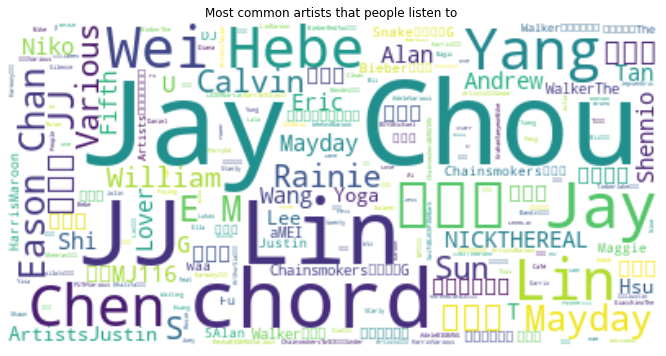

In [ ]:
import matplotlib.pyplot as plt    
from wordcloud import WordCloud

def displaywc(txt,title):
    txt=""
    for i in g:
        txt+=str(i)
    wordcloud = WordCloud(background_color='white').generate(txt)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()
    
g=song_repeats.sort_values(by='count',ascending=False)[:200].artist_name.tolist()
#TODO Investigate how to display chinese
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common artists that people listen to ')

Language of most common songs

Text(0.5, 0, 'Language')

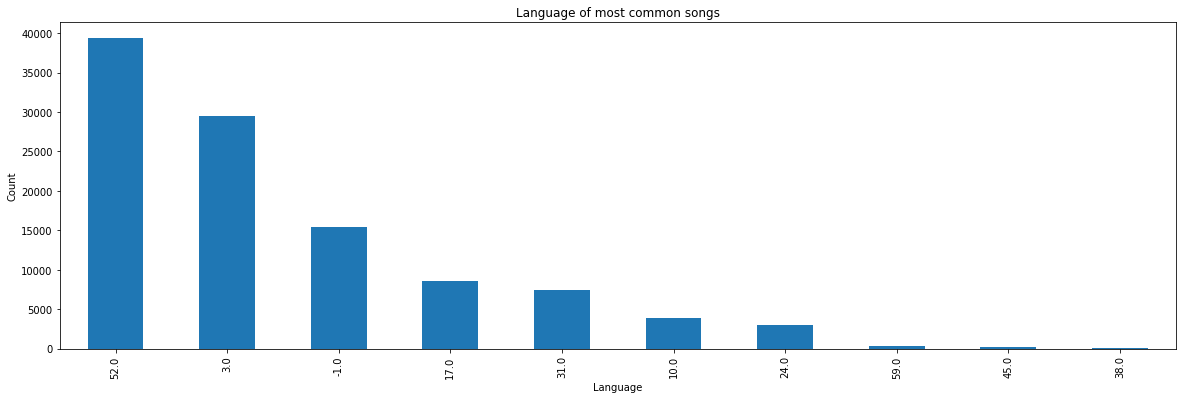

In [ ]:
df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False))
df.language.value_counts().plot(kind='bar')
plt.title('Language of most common songs')
plt.ylabel('Count')
plt.xlabel('Language')

In [ ]:
print('Shape of train is ->',train.shape)
print('Shape of test is ->',test.shape)
print('Shape of Song Extra Info is ->',song_extra_info.shape)
print('Shape of Members is ->',members_data.shape)
print('Shape of Songs is ->',song.shape)


Shape of train is -> (1862850, 6)
Shape of test is -> (1835546, 6)
Shape of Song Extra Info is -> (2295971, 3)
Shape of Members is -> (34403, 7)
Shape of Songs is -> (1765419, 7)


In [ ]:
def get_codes(isrc):
    if pd.isnull(isrc):
        return np.nan
    else:
        if int(str(isrc)[5:7]) > 17:
            temp =  1900+int(str(isrc)[5:7])
        else:
            temp = 2000+int(isrc[5:7])
        return temp

In [ ]:
song_extra_info['year'] = song_extra_info['isrc'].apply(lambda x: get_codes(x))
song_extra_info.sample(10)

,song_id,name,isrc,year
279930,MLBabpmCbN8s7VoouWDtDGtPej3NIplJd+BoPvnyP/8=,Start Of Time,GBAYE1202443,2012.0
571741,0T1dujH8A1FriD34MU80GD1dAn3+QxpoObgVoj37gik=,Aquamarina (Extended Original Version),ROCMA1309713,2013.0
1349069,SrMMKNzW0T80wgHwAFz1giSn0yOBi0H4Pu4edYpjmSk=,Aquellas Cosas Que Solíamos Hacer,ES8240923715,2009.0
1876496,fKr4C4h9rDsyxZqdkDTweXIzHgOVO22EIjWZ5Hbvy3w=,Mr. Time,USAR19300156,1993.0
1136802,GyfpS88YK/ZjGToon0CEv/ErLg3dp/mci/ydmrHPQ78=,Labour of Love,AUWA01400098,2014.0
1763469,9kFC4G2S3m6RcWQHNCVWwFOVUXdGJbC7ls0Hg/WJD9U=,Broh!,DEW871509374,2015.0
718733,9a6l5M+teR5nMb6mku0U6a3swQpVMuLgo2ZX+MSMQQo=,Homewrecker,USUYG1034057,2010.0
1366773,MzhTyja3LricxDppV0k3OB5He1N0autY2CfOn7I14VI=,"Theme From ""New York| New York""",USY9R0910617,2009.0
1710564,vZ84sDD0TCqJ4+fB7uJpaW+JygwnOpjt1ZgbtR5hqgo=,THE LION SLEEPS TONIGHT - The Tukens,NaN,NaN
1070803,MAC5lLg3SphRszGYlTBtjNYJt1es3UivWfbnAAlpVnE=,Wish Where You Are,CAI370610335,2006.0


In [ ]:
# Extending columns
# merging the database
train = train.merge(song , on='song_id' , how='left')
train = train.merge(members_data , on = 'msno' , how='left')
train = train.merge(song_extra_info , on = 'song_id' , how='left')
test  = test.merge(song , on='song_id' , how='left')
test = test.merge(members_data , on = 'msno' , how = 'left')
test =  test.merge(song_extra_info , on = 'song_id' , how = 'left')
del song_extra_info ,members_data , song
gc.collect()

63

In [ ]:
print(train['song_length'].isnull().value_counts()/train.shape[0])
train['song_length'].fillna(train['song_length'].mean() , inplace = True)
train['song_length'] = train['song_length'].astype(np.uint32)
print(train['language'].isnull().value_counts()/train.shape[0])
train['language'].fillna(train['language'].mode().values[0] , inplace= True)
train['language'] = train['language'].astype(np.int8)
test['song_length'].fillna(test['song_length'].mean() , inplace = True)
test['song_length'] = test['song_length'].astype(np.uint32)
test['language'].fillna(test['language'].mode().values[0] , inplace= True)
test['language'] = test['language'].astype(np.int8)

False    0.9527
True     0.0473
Name: song_length, dtype: float64
False    0.952695
True     0.047305
Name: language, dtype: float64


In [ ]:
def genre_count(genre):
    if genre == 'no_genre_id':
        return 0
    else :
        return genre.count('|') + 1
print(train['genre_ids'].isnull().value_counts()/train.shape[0])
train['genre_ids'].fillna('no_genre_id' , inplace= True)
train['genre_ids_count'] = train['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)
test['genre_ids'].fillna('no_genre_id' , inplace= True)
test['genre_ids_count'] = test['genre_ids'].apply(lambda x: genre_count(x)).astype(np.int8)

False    0.938575
True     0.061425
Name: genre_ids, dtype: float64


In [ ]:
def artist_count(art):
    if art=='no_artist_name':
        return 0
    else:
        return art.count('|')+art.count('/') + art.count('//') + art.count(';') + 1
train['artist_name'].isnull().value_counts()
train['artist_name'].fillna('no_artist_name' , inplace = True)
train['artist_count'] = train['artist_name'].apply(lambda x : artist_count(x)).astype(np.int8)
test['artist_name'].fillna('no_artist_name' , inplace = True)
test['artist_count'] = test['artist_name'].apply(lambda x : artist_count(x)).astype(np.int8)

In [ ]:
def  count_composer(comp):
    if comp=='no_composer':
        return 0
    else:
        return comp.count('|')+comp.count('/') + comp.count('//') + comp.count(';') + 1
def  count_lyricist(lyr):
    if lyr=='no_lyricist':
        return 0
    else:
        return lyr.count('|')+lyr.count('/') + lyr.count('//') + lyr.count(';') + 1

In [ ]:
train['composer'].fillna('no_composer',inplace=True)
train['composer_count'] = train['composer'].apply(lambda x: count_composer(x)).astype(np.int8)
train['lyricist'].fillna('no_lyricist',inplace=True)
train['lyricist_count'] = train['lyricist'].apply(lambda x: count_lyricist(x)).astype(np.int8)
test['composer'].fillna('no_composer',inplace=True)
test['composer_count'] = test['composer'].apply(lambda x: count_composer(x)).astype(np.int8)
test['lyricist'].fillna('no_lyricist',inplace=True)
test['lyricist_count'] = test['lyricist'].apply(lambda x: count_lyricist(x)).astype(np.int8)

In [ ]:
dict_count_song_played_train = {k: v for k, v in train['song_id'].value_counts().iteritems()}
dict_count_song_played_test = {k: v for k, v in test['song_id'].value_counts().iteritems()}
def return_number_played(x):
    try:
        return dict_count_song_played_train[x]
    except KeyError:
        try:
            return dict_count_song_played_test[x]
        except KeyError:
            return 0
train['number_of_time_played'] = train['song_id'].apply(lambda x: return_number_played(x))
test['number_of_time_played'] = test['song_id'].apply(lambda x: return_number_played(x))

In [ ]:
dict_user_activity = {k:v for k,v in pd.concat([train['msno'] , test['msno']] , axis = 0).value_counts().iteritems()}
def return_user_activity(x):
    try:
        return dict_user_activity[x]
    except KeyError:
        return 0
train['user_activity_msno'] = train['msno'].apply(lambda x: return_user_activity(x))
test['user_activity_msno'] = test['msno'].apply(lambda x: return_user_activity(x))

In [ ]:
train_col = list(train.columns)
test_col = list(test.columns)
for f in test_col :
    if f not in train_col:
        print('ERROR !!!  Column from Test not found in train is ->' , f)
label_encoding = ['source_system_tab', 'source_screen_name',
       'source_type','gender']
drop = ['msno', 'song_id' , 'isrc','artist_name',
       'composer', 'lyricist','name','genre_ids']
min_max_scaling = ['number_of_time_played', 'user_activity_msno','membership_days', 'song_length']

ERROR !!!  Column from Test not found in train is -> id


#Exploratory Data Analysis

How many times do the user listen to the song again

In [ ]:
print(train.target.value_counts()*100/train.target.value_counts().sum())
print('How many unique songs ',len(train.song_id.unique()))

1.0    65.028244
0.0    34.971756
Name: target, dtype: float64
How many unique songs  165440


In [ ]:
#How many times do the user listen to the song again
print(train.target.value_counts()*100/train.target.value_counts().sum())
print('How many unique songs ',len(train.song_id.unique()))

1.0    65.028244
0.0    34.971756
Name: target, dtype: float64
How many unique songs  165440


In [ ]:
#Which songs are getting repeated
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = (20, 6)
repeats=train[train.target==1]
song_repeats=repeats.groupby('song_id',as_index=False).msno.count()
song_repeats.columns=['song_id','count']

In [ ]:
import matplotlib.pyplot as plt    
from wordcloud import WordCloud

def displaywc(txt,title):
    txt=""
    for i in g:
        txt+=str(i)
    wordcloud = WordCloud(background_color='white').generate(txt)

    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()

Text(0.5, 0, 'Language')

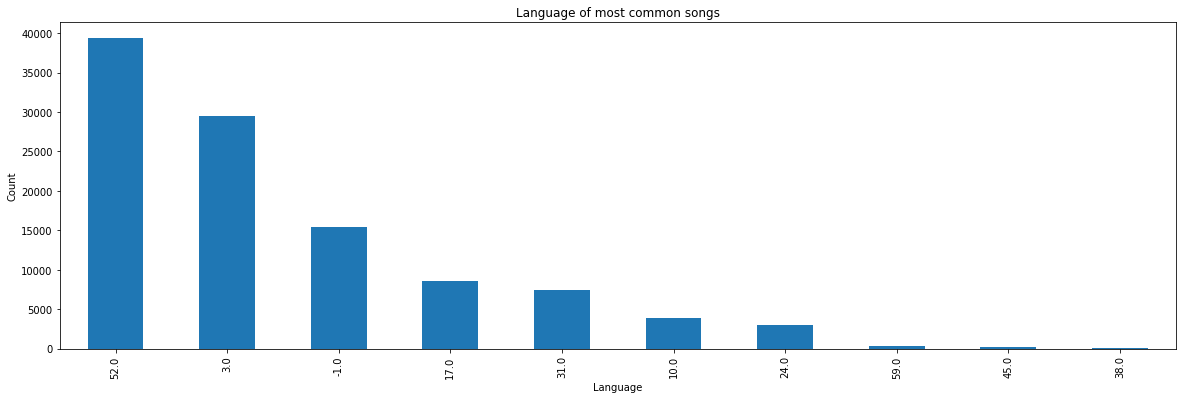

In [ ]:
#Language of most common songs
df=pd.DataFrame(song_repeats.sort_values(by='count',ascending=False))
df.language.value_counts().plot(kind='bar')
plt.title('Language of most common songs')
plt.ylabel('Count')
plt.xlabel('Language')

Text(0, 0.5, 'count')

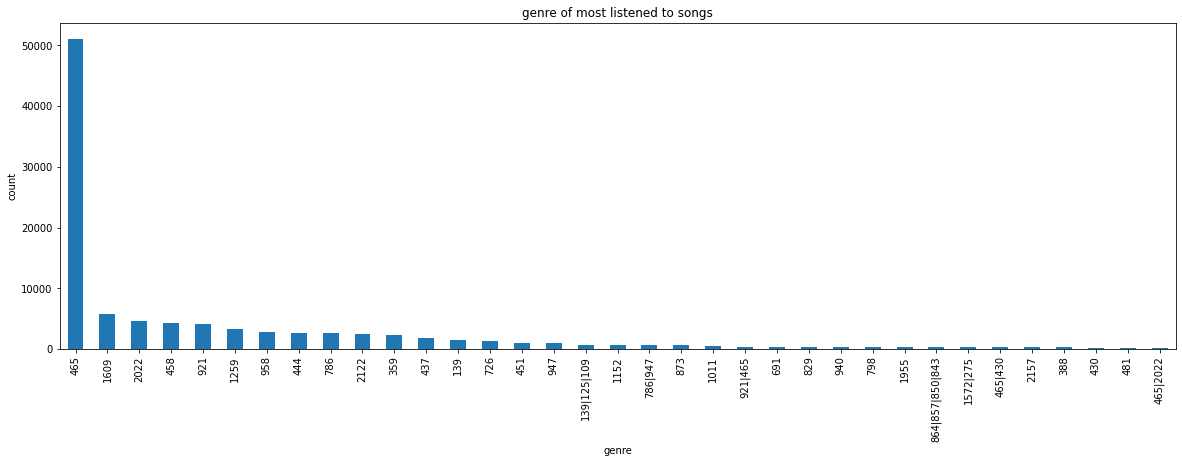

In [ ]:
df.genre_ids.value_counts()[:35].plot(kind='bar')
plt.title('genre of most listened to songs')
plt.xlabel('genre')
plt.ylabel('count')

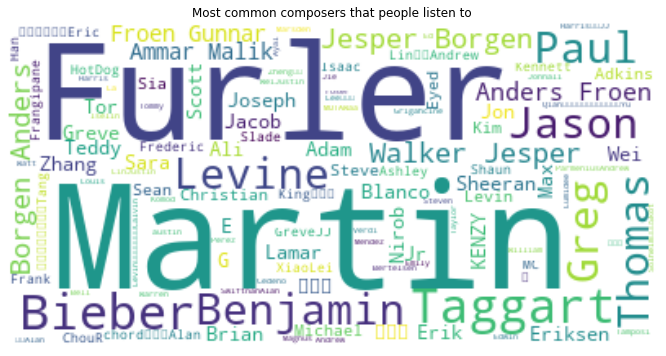

In [ ]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].composer.tolist()
#TODO Investigate how to display chinese
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common composers that people listen to ')

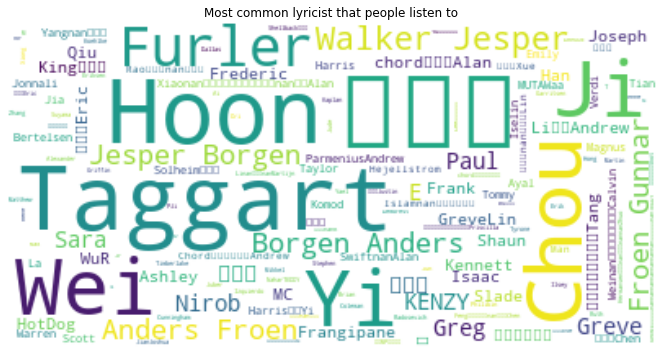

In [ ]:
g=song_repeats.sort_values(by='count',ascending=False)[:200].lyricist.tolist()
#TODO Investigate how to display chinese
txt=""
for i in g:
    txt+=str(i)
displaywc(txt,'Most common lyricist that people listen to ')

In [ ]:
print('Users that listen to the same song again and again')
repeats.msno.value_counts()[:10]

Users that listen to the same song again and again


o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    1059
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=     862
04gL4TVAzollv/ansOnX8Ns2XKiSId1Hnloq+g2UlKk=     856
x+k/zTEqdgYq6O+r1iDjKRaQnaCS5118gzBe8c12r1Y=     807
XkORogCcAwIoTSBptOED51tv9wXQ2WCEqGgvwqKsyU0=     795
UfneAP0cJfVVl3K0rNcF+7+O3iGX/X7rGXyvklQ4RLs=     791
K7obY5lUlZTd6a/byE9NG/e7Q/dlgHfppLbYk8OL7os=     778
8NthxmOVPiiilOtgBQs86xila73VHPztb412le30VNA=     777
MxCUQ6tAD7LU1yR0gwRck91ZKE88gY8kD/rX9Hi9srQ=     771
mDJCU+fKu/mbdk9l4SmPYiJwpeMyK44o9wmG1X3735A=     761
Name: msno, dtype: int64

Text(0, 0.5, 'count')

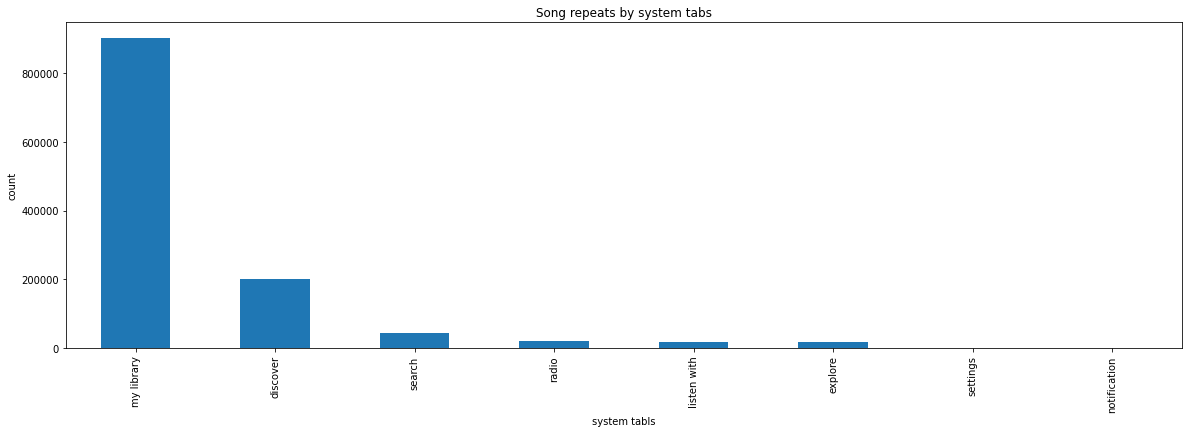

In [ ]:
repeats.source_system_tab.value_counts().plot(kind='bar')
plt.title('Song repeats by system tabs')
plt.xlabel('system tabls')
plt.ylabel('count')

Text(0, 0.5, 'count')

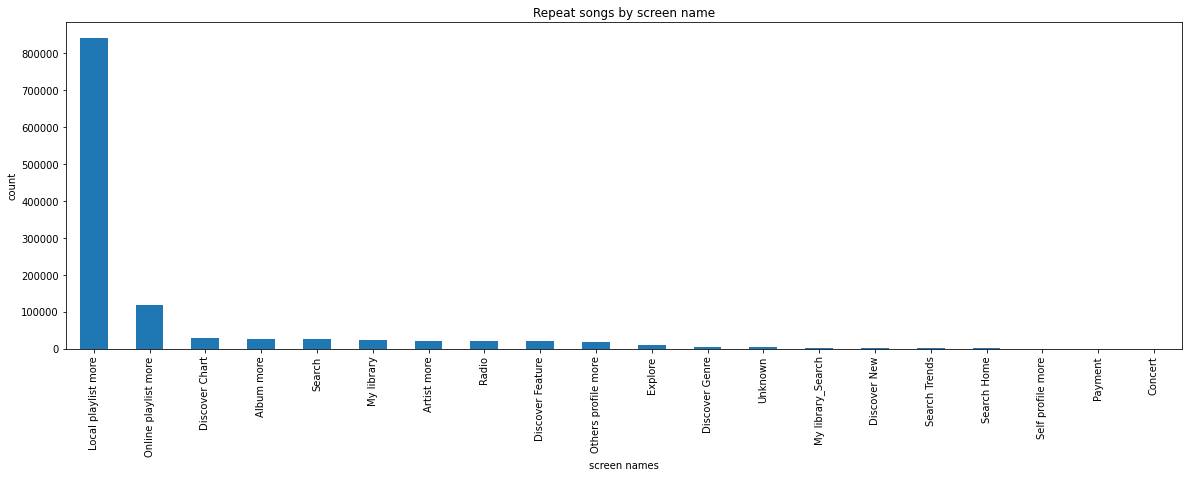

In [ ]:
repeats.source_screen_name.value_counts().plot(kind='bar')
plt.title('Repeat songs by screen name')
plt.xlabel('screen names')
plt.ylabel('count')

Text(0, 0.5, 'count')

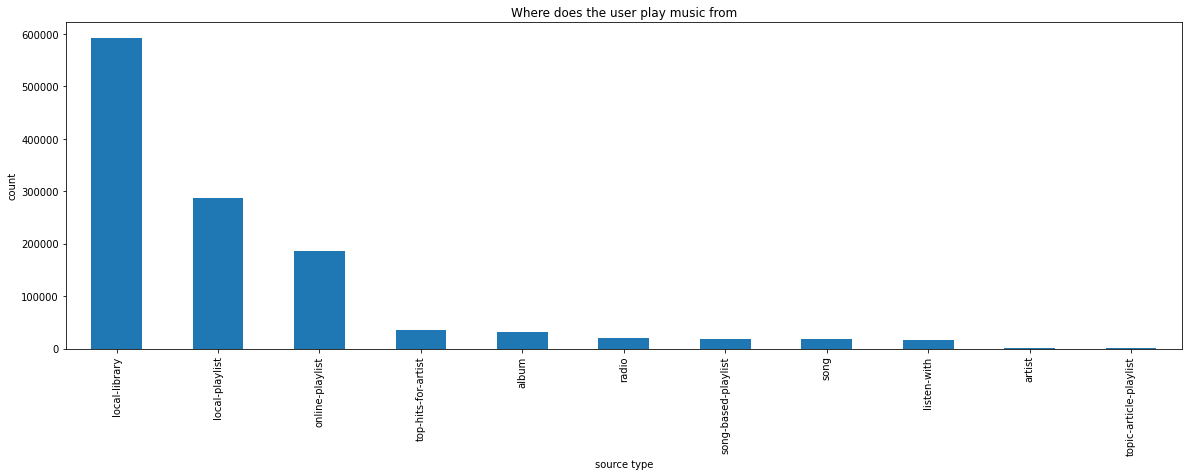

In [ ]:
repeats.source_type.value_counts().plot(kind='bar')
plt.title('Where does the user play music from')
plt.xlabel('source type')
plt.ylabel('count')

In [ ]:
user_repeats=repeats.merge(members_data,left_on='msno',right_on='msno',how='left')
print("users who repeat")
user_repeats.msno.value_counts()[:20]

users who repeat


o+5RNlSWrzvrphgBNGIo1FLkGxBgyICns6qXj3nS7Pk=    1059
FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=     862
04gL4TVAzollv/ansOnX8Ns2XKiSId1Hnloq+g2UlKk=     856
x+k/zTEqdgYq6O+r1iDjKRaQnaCS5118gzBe8c12r1Y=     807
XkORogCcAwIoTSBptOED51tv9wXQ2WCEqGgvwqKsyU0=     795
UfneAP0cJfVVl3K0rNcF+7+O3iGX/X7rGXyvklQ4RLs=     791
K7obY5lUlZTd6a/byE9NG/e7Q/dlgHfppLbYk8OL7os=     778
8NthxmOVPiiilOtgBQs86xila73VHPztb412le30VNA=     777
MxCUQ6tAD7LU1yR0gwRck91ZKE88gY8kD/rX9Hi9srQ=     771
mDJCU+fKu/mbdk9l4SmPYiJwpeMyK44o9wmG1X3735A=     761
dU4RbzpIRRd/EkA9Xncpy9CglzDBZp7nKMfdnfr3Aj8=     751
EZmIP7zKgqKwpEHnuDjRIkzCmcLNlHn4hkiglZ5LxK8=     736
wv0o115CdKSsFlsV7VvHikjyxLG0LFc5qALhM8xkUZ4=     710
YQiox2a4tbRbNBaL+VfOLH8oea77HPJMPWRh8euXZqM=     698
1d4acB2bhEZCFjSRwvO4ls8PrBtvNTlkcAcxYx8FcWE=     695
FaH6rl69OOVwbsO30jjdjVXD9wJO8pcVZS6LGy5zTJM=     693
hOyJGmY7tciqGf1EhDj5UT86IfSSnaTHP5JWAPxYN6s=     678
V39VxDdE9SgMQZnX58oQChm9W056pw2lC3TiifMfkKw=     675
JkQacE3rvmhh65R04eDLbu+M7MCkpzmHwMGrbZo0puc=  

In [ ]:
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
1087538,qDJ/7NFjqM9EYizi8XtxwUnAjLctvpzn67d88TfPM3w=,7rgWNZni0HIx3E3WN6tuSQgSj87abWl3XgYUqLCzqfw=,my library,Local playlist more,local-library,1.0
1274884,1ONjOpV+dWRdNKp5xBA6RRrjBwEd5kxhktWWb2Gb+EA=,GH1lCv92RfOWdIdAGWBtrGkTvIDhkAEvFPzF83FSlPg=,my library,Local playlist more,local-library,0.0
312171,lxe/ahYw4fgFdBxaF+HImq6xFZyOu1RdBACfDjc4BII=,KZ5hwP74wRO6kRapVIprwodtNdVD2EVD3hkZmmyXFPk=,explore,NaN,online-playlist,1.0
516611,/XC3nOESeL+IeLSJbUWTXHjvZb32RTJGFB8VukwF0Gc=,aagZ2xbBUQkw1OIwBVkCNQistv/FxhiyJXwq9Fe06KU=,discover,Online playlist more,online-playlist,0.0
1075615,6SLABvU8YdJIgg53usKoTkbzkcsRsdvIeiNAPud/lwY=,9YYrODwrXpDcCjOJypHROv3f5z40y11QlmgQjmzp2vQ=,discover,Online playlist more,online-playlist,1.0
1441686,wNB4jyKgTUXhXzqMUgzzk/vbj8GMBtlFIal9i1miUY0=,FynUyq0+drmIARmK1JZ/qcjNZ7DKkqTY6/0O0lTzNUI=,my library,Local playlist more,local-library,0.0
1236923,3LnDzEQvLZqsS1Ub7OLoT7S8M9qS6JSVDU1UEnepvyI=,mM5OGjv0vGb8brl3FpPmv8patwmIyxhnWSgrvr3hK6U=,my library,Local playlist more,local-library,1.0
147366,lwX/kVVz1+Qi0gws75xrUEP43tzkbyXhtQxNrr2ZpmQ=,4YmidMnG4cz8Dii47n0vxZCKyzVl2yKqohPD1k/fHk4=,my library,Local playlist more,local-playlist,1.0
1737745,bw67DKcXpatTUWw59oVMMygosTTtCGJBoELdUlZoKEI=,SA0F7f0P53QOCXwm3auQQdPnVGDQ6y4F1QJrD4+ugx8=,search,Artist more,top-hits-for-artist,0.0
762103,n3WFFTXRw8YvnMfJgigliLDA2ss7zk5JIPRXUN+dC0c=,I+4IOKO4seym5duHe9fvBN4HrLOeeRbb4aodygspjvA=,discover,Album more,album,0.0


In [ ]:
X_train = train.drop(columns = ['target'] , axis = 1)
Y_train = train['target'].values
X_test = test.drop(columns = ['id'] , axis = 1)
ids = test['id'].values
del train , test
gc.collect()
train_set = lgb.Dataset(X_train , Y_train)

In [ ]:
sub.head()

,id,target
0,0,0.408406
1,1,0.563555
2,2,0.207412
3,3,0.172874
4,4,0.240702


In [ ]:
data  = pd.read_csv("/content/1st_submission.csv")